In [5]:
import pandas as pd
df_min = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/corrected_gps_information_new.csv')
df_list2 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/table_horaire.csv', encoding='latin-1')
df_list3 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/suivi_mc.csv', encoding='latin-1')

print(df_min.head())

print(df_list2.head())
print(df_list3.column())

   Unnamed: 0   sampno  placeno             time_utc           time_local  \
0           1  8447624        3  2014-09-16 05:33:01  2014-09-16 07:33:01   
1           2  8447624        3  2014-09-16 05:33:06  2014-09-16 07:33:06   
2           3  8447624        3  2014-09-16 05:33:11  2014-09-16 07:33:11   
3           4  8447624        3  2014-09-16 05:33:16  2014-09-16 07:33:16   
4           5  8447624        3  2014-09-16 05:33:21  2014-09-16 07:33:21   

   longitude   latitude    altitude  speed valid  hdop  nbsat  
0   2.284952  48.963909  284.100006    2.5     A   1.0      7  
1   2.285028  48.963881  282.500000    5.6     A   1.0      7  
2   2.285242  48.963832  282.399994    9.5     A   0.9      8  
3   2.285622  48.963788  281.500000   12.9     A   1.4      7  
4   2.286126  48.963615  282.500000   18.1     A   1.4      7  
   Unnamed: 0 PersonUserme    N_ipc  placeno      locno other1  supermarket1  \
0           1           p1  8230285      1.0        1.0    NaN          -

D:\Programmes\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


AttributeError: 'DataFrame' object has no attribute 'column'

In [4]:
### Labeliser base prends un certain temps!
### on fait une jointure en fonction du temps entre les 2 bases 

import pandas as pd
import json
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt



df_min = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/corrected_gps_information_new.csv')
df_list2 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/table_horaire.csv', encoding='latin-1')
df_list3 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/suivi_mc.csv', encoding='latin-1')



listid=[]
for i in range(len(df_min)):
    listid.append(df_min['sampno'].iloc[i])

# liste de chaque utilisateurs differents  , servira pour la boucle ci dessous 
user=list(set(listid))

import time
df_min['label']="vide"
df_list=[]

for u in user:
    df_minU=df_min.loc[df_min['sampno']==u,:]
    df_U=df_list2.loc[df_list2['N_ipc']==u,:]  #utilisateur jointure sur N_ipc, et sampno
    listI=df_U.locme.index.tolist()
    for i in range(df_minU.index[0], df_minU.index[0]+len(df_minU)-1):
        
        newdate1 = time.strptime(df_minU.time_local[i] , "%Y-%m-%d %H:%M:%S")
        
        
        for j in listI:
                newdate2 = time.strptime(df_U.start_time[j] , "%m/%d/%y %H:%M")
                newdate3 = time.strptime(df_U.stop_time[j] , "%m/%d/%y %H:%M")
                if newdate1<= newdate3 and newdate1>=newdate2:
                    df_minU.label[i]=df_U.locme[j]
    df_list.append(df_minU)
  
df_label = pd.concat(df_list, ignore_index=True)

#df_label.to_csv("baseLabexample.csv", sep=',')




AttributeError: module 'pandas' has no attribute 'core'

25                     vide
26                     vide
27                     vide
28                     vide
29                     vide
30                     vide
31                     vide
32                     vide
33                     vide
34                     vide
118                    vide
119                    vide
120                    vide
121                    vide
122                    vide
183                    vide
184                    vide
185                    vide
186                    vide
187                    vide
188                    vide
189                    vide
190                    vide
191                    vide
284                    vide
340                    vide
341                    vide
342                    vide
343                    vide
344                    vide
                 ...       
1014693    AchÌ¬res - Ville
1014694    AchÌ¬res - Ville
1014695    AchÌ¬res - Ville
1014696    AchÌ¬res - Ville
1014697    AchÌ¬res 

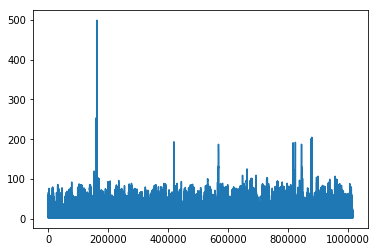

1016439
1016439


D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: invalid value encountered in double_scalars


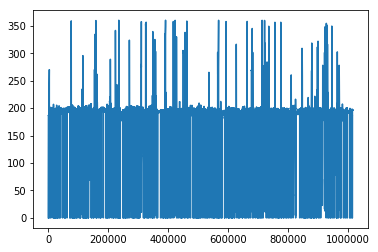

In [8]:
import pandas as pd
import json
import numpy as np
import datetime 
from datetime import datetime
import math

import matplotlib.pyplot as plt



df_min = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/baseLab.csv', encoding='latin-1')
df_min2 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/AutreP/Livraison 1_CSV/corrected_gps_information_new.csv')









df_rapide= df_min[df_min.speed>40]
print(df_rapide.label)

rapidelabel=[]
for i in range(0,len(df_rapide)):
    rapidelabel.append(df_rapide['label'].iloc[i])
RL= set(rapidelabel)
print(RL)
    
print(df_min.head())

plt.plot(df_min.speed)
plt.show()
df_min['metro']=0
df_min['bus']=0
df_min['voiture']=0
df_min['marche']=0
df_min['acceleration']=0
df_min['acceleration1000']=0
df_min['speedMS']=df_min['speed']*0.278
df_min['difTempsSec']=0
df_min['moyenT']=0
df_min['angle']=0
df_min['smooth']=0



smooth=[]

#def CalculSmooth(s1,s2,s3):
#    vit=1/3*(s1+s2+s3)
#    return vit
#
#smooth.append(df_min.speed[0])
#smooth.append(1/2*(df_min.speed[0]+df_min.speed[1]))
#for i in range(2 , len(df_min)):
#    if df_min.sampno[i]==df_min.sampno[i-1] and df_min.sampno[i-1]==df_min.sampno[i-2]:
#        s=CalculSmooth(df_min.speed[i],df_min.speed[i-1],df_min.speed[i-2])
#        smooth.append(s)
#    elif df_min.sampno[i]==df_min.sampno[i-1] and df_min.sampno[i-1]!=df_min.sampno[i-2]:
#        s=1/2*( df_min.speed[i]+df_min.speed[i-1])
#        smooth.append(s)
#    elif df_min.sampno[i]!=df_min.sampno[i-1]  :
#        s=df_min.speed[i]
#
#print(len(smooth))
#print(len(df_min))
#
#df_min.smooth=smooth  



temps=[]
temps.append(0)
for i in range(0, len(df_min)-1):
   
    d1 = datetime.strptime(df_min.time_local[i], "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(df_min.time_local[i+1], "%Y-%m-%d %H:%M:%S")
    t=d2-d1
    temps.append(t.total_seconds())
    
    
df_min.difTempsSec=temps


### feature smooth average 
df_min['smooth']=0



smooth=[]

def CalculSmooth(s1,s2,s3):
    vit=1/3*(s1+s2+s3)
    return vit

smooth.append(df_min.speed[0])
smooth.append(1/2*(df_min.speed[0]+df_min.speed[1]))
for i in range(2 , len(df_min)):
    if df_min.sampno[i]==df_min.sampno[i-1] and df_min.sampno[i-1]==df_min.sampno[i-2]:
        s=CalculSmooth(df_min.speed[i],df_min.speed[i-1],df_min.speed[i-2])
        smooth.append(s)
    elif df_min.sampno[i]==df_min.sampno[i-1] and df_min.sampno[i-1]!=df_min.sampno[i-2]:
        s=1/2*( df_min.speed[i]+df_min.speed[i-1])
        smooth.append(s)
    elif df_min.sampno[i]!=df_min.sampno[i-1]  :
        s=df_min.speed[i]
        smooth.append(s)
print(len(smooth))
print(len(df_min))

df_min.smooth=smooth          
  











 
acceleration=[]
acceleration.append(0)
for i in range(1, len(df_min)):
    if df_min.sampno[i]==df_min.sampno[i-1]:
        a=df_min.speedMS[i]-df_min.speedMS[i-1]
        b=a/df_min.difTempsSec[i]
        acceleration.append(b)
    else:
        b=0
        acceleration.append(b)
df_min.acceleration=acceleration
df_min.acceleration1000=np.absolute(df_min.acceleration)
#print(df_min.acceleration.max())
    
#Calculer varaition angulaire trajectoire


def CalculAngle(lat1,long1,lat2,long2):
    dLon = (long2 - long1)
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1)* math.cos(lat2) * math.cos(dLon)
    brng = math.atan2(y, x)
    brng = math.degrees(brng)
    brng = (brng + 360) % 360
    brng = 360 - brng
    return brng

angles=[]
angles.append(0)

for i in range(1, len(df_min)):
    if df_min.sampno[i]==df_min.sampno[i-1]:
        angle =CalculAngle(df_min.latitude[i-1],df_min.longitude[i-1],df_min.latitude[i],df_min.latitude[i])
        angles.append(angle)
    else:
        angle=0
        angles.append(angle)

df_min.angle=angles


plt.plot(df_min.angle)
plt.show()

  


def MotV(mot):
    for i in range(0, len(df_min)):
        if mot in df_min.label[i] and df_min.speed[i]>3 :
            #df_min.voiture[i]=1
            df_min.set_value(i ,'voiture',1)
            

def Mot(mot):
    for i in range(0, len(df_min)):
        if mot in df_min.label[i] and  df_min.speed[i]<8 and df_min.acceleration1000[i] <12 :  # on enleve le speed pour avoir le deb et la fin
            df_min.set_value(i ,'marche',2)

def MotB(mot):
    for i in range(0, len(df_min)):
        if mot in df_min.label[i] and df_min.speed[i]>3:
            df_min.set_value(i ,'bus',3)
            
            



def MotG(mot,motCat, df):
    for i in range(0, len(df)):
        if mot in df.label[i]:
            df_min[motCat].iloc[i]=1
            
            
            
def MotExclut(mot, motE,motE1, motE2):
    for i in range(0, len(df_min)):
        if mot in df_min.label[i] and motE not in df_min.label[i] and motE1 not in df_min.label[i] and motE2 not in df_min.label[i] and df_min.speed[i]>5:
            df_min.set_value(i ,'metro',4)


MotExclut('RER', 'bus', 'Bus', 'BUS')

MotExclut('Gare', 'bus', 'Bus', 'BUS')
MotExclut('GARE', 'bus', 'Bus', 'BUS')
            

### Ici on déduit des tagues de moyen de transport à l'aide de mot clé dans la description , cette méthode n'est pas 
# parfaite car par exemple  certaines personne mettent  "Residence"  en description pour signifier qu'ils sont chez eux (donc à pied) ,
#  et d'autre mettent cette description pour signifier qu ils rentrent chez eux (et parfois en voiture ...) pour en partie pallier à 
# on a rajouté une vitesse limite au sein de la résidence ici 8km/h (on mettra surement plus bas ), Methode "Mot"

Mot('RÌ©sidence')
Mot('MARCHE CHIEN')



# vitesse moyenne ici 9.5km/h
MotB('Bus')
MotB('BUS')
MotB('bus')

#df_min3=df_min.loc[df_min['bus']==3,:]
#plt.plot([i for i in range(0, len(df_min3))], df_min3.speed)
#plt.show()
#plt.plot([i for i in range(0, len(df_min3))], df_min3.angle)
#plt.show()
#print(df_min3.angle.mean())
#print(df_min3.acceleration1000.mean())
#print(df_min3.speed.mean())


#print(df_min1.speed.mean())
#print(df_min1.speed.mode())
#print(df_min1[['speed', 'label']])
#


### meme principe qu'avant , sauf que ici on a exclut plusieurs mot Bus pour éviter les descriptions ayant des nom d'arrets de 
#bus contenant le mot RER, vitesse moyenne ici 27km/h

MotExclut('RER', 'bus', 'Bus', 'BUS')
#df_min2=df_min.loc[df_min['metro']==4,:]
#plt.plot([i for i in range(0, len(df_min2))], df_min2.speed)
#plt.show()
#plt.plot([i for i in range(0, len(df_min2))], df_min2.angle)
#plt.show()
#print(df_min2.angle.mean())
#print(df_min2.acceleration1000.mean())
#print(df_min2.speed.mean())



# on suppose qu'avec ce tague que la personne est en voiture , vitesse moyenne ici 11km/h
MotV('Stationnement')
#df_min1=df_min.loc[df_min['voiture']==1,:]
#plt.plot([i for i in range(0, len(df_min1))], df_min1.speed)
#plt.show()
##
#print(df_min1.speed.mean())
#print(df_min1.acceleration1000.mean())
#base=pd.DataFrame()
#base=Trans(df_min)

# on recuperla valeur des tagg , Voiure =1 , Marche =2, Bus= 3 ,Rer=4
df_min.moyenT=df_min.bus+df_min.metro+df_min.marche+df_min.voiture

df_min.to_csv("LabelVitAccModif.csv", sep=',')




#print(df_min2[['speed', 'label']])


#print(df_min[['speed','label']])
#labels=[]
#
#
#for i in range(0, len(df_min)):
#    labels.append(df_min.label[i])
#    
#label= list(set(labels))
#print(label)
##    

In [9]:
#Ici nous allons tagué les trajectoires par des ids chaque trajectoires différentes aura un id different 
# Pour ce faire à chaque fois que qu'un utilisateur change on incremente Id OU 
# à chaque fois que le mode de transport change on incrémente l'Id
# ou que le temps entre deux points est jugé trop long entre l'enregistrement de 2 points successifs 
#(difTempsSec> valeur  ici on choisit 120 secondes ) on incrémente aussi l'Id
#exemple : éviter que pour un meme utilisateur qui reprenne le meme mode 
# de transport le lendemain par lequelle il est arrivé l a veille soit consideré  comme une meme trajectoire




# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *

master_df = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetGitHub - Copie (2)/LabelVitAccModif.csv', encoding='latin-1')



print(master_df.head())

#on garde les variables qui nous interesse ..
g= master_df[['sampno','longitude', 'latitude', 'altitude','speed', 'smooth','acceleration1000', 'acceleration','angle','moyenT','difTempsSec']]




#IDS sera la liste contenant les id ,on initialise la valeur d'ID à 0 , et on ajoute 0 à IDS  pour une question d'indexage 
#dans la boucle 
IDS=[]
ID=0
IDS.append(0)
for i in range(1, len(g)):
    if g.sampno[i]!=g.sampno[i-1] or g.moyenT[i]!=g.moyenT[i-1] or g.difTempsSec[i]>120.0  :
        
        ID=ID+1
    IDS.append(ID)


g['Id']=IDS

#on supprime les lignes qui ne sont pas tagué par un mode de transport 
g= g[g.moyenT != 0]

#on enregistre 
g.to_csv('IDPartiel.csv', sep=',')




#ON REAJUSTE ICI LES IDS , car on a supprimé tous les ligne  des trajectoires non tagué 

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt



from pylab import *

g = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetGitHub - Copie (2)/IDPartiel.csv', encoding='latin-1')

# meme principe qu'avant  on reajuste juste ici les valeurs des index, qui seront contenue par la colonne Id1 de la base   
# et on construit la liste y contenant la valeur  des classes 
IDS1=[]
ID1=0
IDS1.append(0)
y11=[]
y11.append(g.moyenT[0])


for i in range(1, len(g)):
    if g.Id[i]!=g.Id[i-1] :
        
        ID1=ID1+1
        y11.append(g.moyenT[i])
    IDS1.append(ID1)


g['Id1']=IDS1
#g=g.drop(['moyenT'], axis=1)

print(len(y11))
print(ID1)
print(y11)

g.to_csv('XmodifV.csv', sep=',')
tabY=pd.DataFrame(np.array(y11))
tabY.to_csv('ymodifV.csv', sep=',')

print(len(g))





   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1   sampno  placeno  \
0           0             0          947343  8507392        2   
1           1             1          947344  8507392        2   
2           2             2          947345  8507392        2   
3           3             3          947346  8507392        2   
4           4             4          947347  8507392        2   

              time_utc           time_local  longitude   latitude    altitude  \
0  2014-12-02 15:23:45  2014-12-02 16:23:45   2.087041  48.983364  177.800003   
1  2014-12-02 15:23:50  2014-12-02 16:23:50   2.086963  48.983344  181.199997   
2  2014-12-02 15:25:15  2014-12-02 16:25:15   2.086911  48.983327  193.399994   
3  2014-12-02 15:25:25  2014-12-02 16:25:25   2.087135  48.983361  183.399994   
4  2014-12-02 15:25:35  2014-12-02 16:25:35   2.087169  48.983235  177.800003   

     ...     bus voiture  marche  acceleration acceleration1000  speedMS  \
0    ...       0       0       0      0.000000

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2459
2458
[1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 4, 2, 4, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 2, 2, 2, 1, 1, 2, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 3, 3, 2, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 1, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 4, 4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3,

D:\Programmes\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\Programmes\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


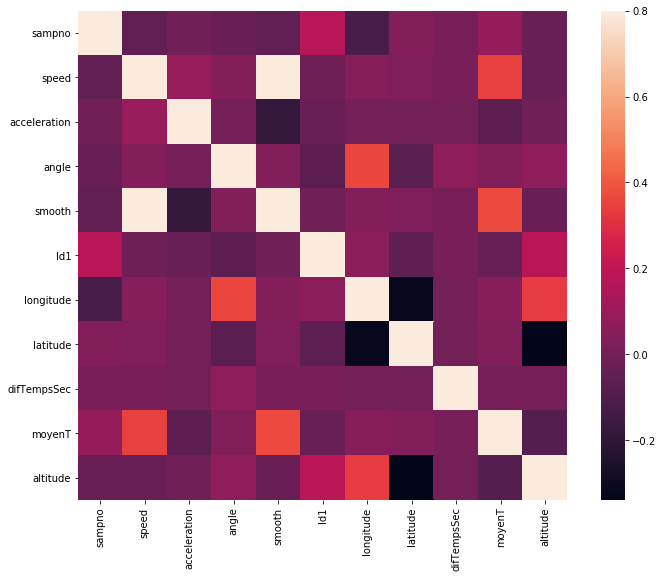

In [1]:
#test accuracy du modele 


# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import tsfresh
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

from tsfresh.feature_extraction import MinimalFCParameters

#from tsfresh.feature_extraction import FeatureExtractionSettings
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import extract_features

from sklearn.cross_validation import train_test_split

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pylab import *

df_1 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetGitHub - Copie (2)/XmodifV.csv')
df_2 = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetGitHub - Copie (2)/ymodifV.csv')

### finalement le feature des variation angulaire sur les trajectoires se revelle benefique 
df_1= df_1[['sampno', 'speed',  'acceleration','angle','smooth','Id1','longitude', 'latitude', 'difTempsSec', 'moyenT', 'altitude']]
#df_1 = df_1[np.isfinite(df_1['acceleration'])]
### on affiche
#print(df_1)
#print(len(df_2))
corrmat = df_1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


Voiture :vitesse moyenne :  12.336007520645175  vitesse mediane:  10.6999998092651
Marche: vitesse moyenne :  3.435795447834722  vitesse mediane:  2.9000000953674303
Bus: vitesse moyenne :  11.248209074052454  vitesse mediane:  9.89999961853027
RER: vitesse moyenne :  26.38287064315156  vitesse mediane:  21.0
Voiture :acceleration moyenne :  0.2018296542550677  acceleration mediane:  0.1445599681854242
Marche: acceleration moyenne :  0.07501178026365464  acceleration mediane:  0.02038666489919012
Bus: acceleration moyenne :  0.1926619848315994  acceeleration mediane:  0.12788001060485824
RER: acceleration moyenne :  0.21091469857633824  acceleration mediane:  0.17236002120971872

 vitesse km voiutre


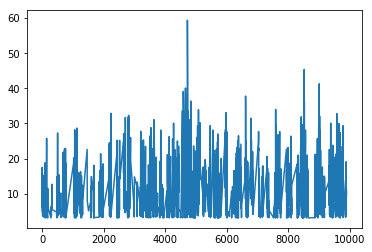

vitesse km marche


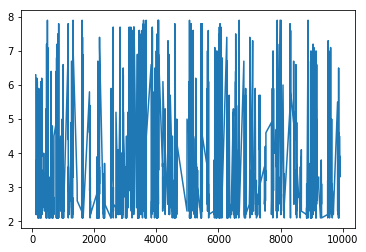

bus


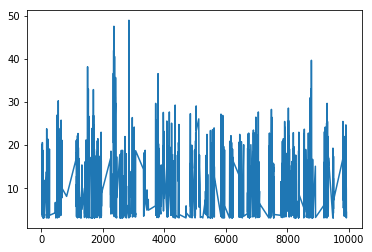

rer


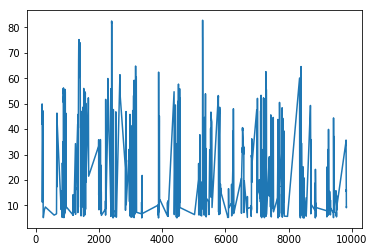

In [11]:
#on constate à l'aide du schéma qu il y a des valeurs pas cohérentes , ex vitesse marche >30km , du à une mauvaise 
#labelisation , ex: on a tagué marche avec Residence, certains mette ce taggue pour signaler qu ils sont chez eux et 
# donc à pied , d'autres pour signaler qu il rentre chez eux
# met critère appliquer précedement pour déduire les classes marchent assez bien car globlamenet 
# vitesse moyenne et mediane semble cohérentes 
# nécessiter de mettre filtre de vitesse sur marche pour vitesse max , et vitesse min pour rer afin de capter le mouvement 
# la pluspart des confusion comme en témoigne la matrice de confusion on lieu avec la marche , car certains utilisateur signale 
#rer quand ils attendent le rer 



df_voiture= df_1[df_1.moyenT==1]
df_marche= df_1[df_1.moyenT==2]
df_bus= df_1[df_1.moyenT==3]
df_rer= df_1[df_1.moyenT==4]
print("Voiture :vitesse moyenne : ",df_voiture.speed.mean(), " vitesse mediane: ", df_voiture.speed.median())
print("Marche: vitesse moyenne : ",df_marche.speed.mean(),  " vitesse mediane: ", df_marche.speed.median())
print("Bus: vitesse moyenne : ",df_bus.speed.mean(),   " vitesse mediane: ", df_bus.speed.median())
print("RER: vitesse moyenne : ",df_rer.speed.mean(),  " vitesse mediane: ", df_rer.speed.median())

print("Voiture :acceleration moyenne : ",np.absolute(df_voiture.acceleration).mean(), " acceleration mediane: ", np.absolute(df_voiture.acceleration).median())
print("Marche: acceleration moyenne : ",np.absolute(df_marche.acceleration).mean(),  " acceleration mediane: ", np.absolute(df_marche.acceleration).median())
print("Bus: acceleration moyenne : ",np.absolute(df_bus.acceleration).mean(),   " acceeleration mediane: ", np.absolute(df_bus.acceleration).median())
print("RER: acceleration moyenne : ",np.absolute(df_rer.acceleration).mean(),  " acceleration mediane: ", np.absolute(df_rer.acceleration).median())


print('\n vitesse km voiutre')
plot(df_voiture.speed)
plt.show()
print('vitesse km marche')
plot(df_marche.speed)
plt.show()
print('bus')
plot(df_bus.speed)
plt.show()
print('rer')
plot(df_rer.speed)
plt.show()

vitesse km voiture


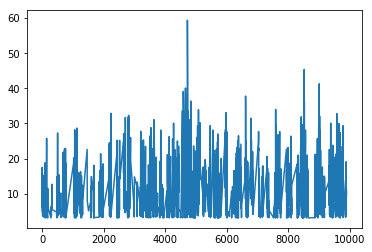

vitesse km marche


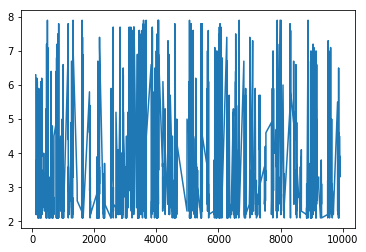

bus


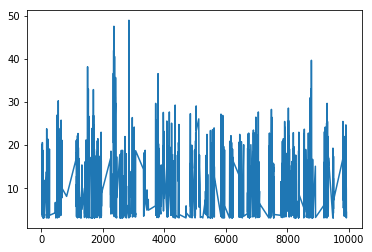

rer


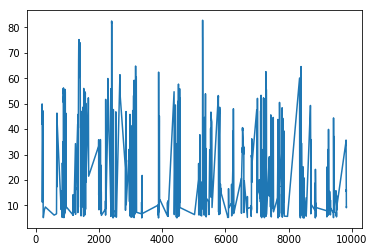

Voiture :vitesse moyenne :  12.336007520645175  vitesse mediane:  10.6999998092651
Marche: vitesse moyenne :  3.435795447834722  vitesse mediane:  2.9000000953674303
Bus: vitesse moyenne :  11.248209074052454  vitesse mediane:  9.89999961853027
RER: vitesse moyenne :  26.38287064315156  vitesse mediane:  21.0
Voiture :acceleration moyenne :  0.2018296542550677  acceleration mediane:  0.1445599681854242
Marche: acceleration moyenne :  0.07501178026365464  acceleration mediane:  0.02038666489919012
Bus: acceleration moyenne :  0.1926619848315994  acceeleration mediane:  0.12788001060485824
RER: acceleration moyenne :  0.21091469857633824  acceleration mediane:  0.17236002120971872


In [12]:
df_voitureM= df_voiture[df_voiture.speed>3]
df_marcheM= df_marche[df_marche.speed<8]
df_busM= df_bus[df_bus.speed>3]
df_rerM= df_rer[df_rer.speed>5]
print('vitesse km voiture')
plot(df_voitureM.speed)
plt.show()
print('vitesse km marche')
plot(df_marcheM.speed)
plt.show()
print('bus')
plot(df_busM.speed)
plt.show()
print('rer')
plot(df_rerM.speed)
plt.show()
print("Voiture :vitesse moyenne : ",df_voitureM.speed.mean(), " vitesse mediane: ", df_voitureM.speed.median())
print("Marche: vitesse moyenne : ",df_marcheM.speed.mean(),  " vitesse mediane: ", df_marcheM.speed.median())
print("Bus: vitesse moyenne : ",df_busM.speed.mean(),   " vitesse mediane: ", df_busM.speed.median())
print("RER: vitesse moyenne : ",df_rerM.speed.mean(),  " vitesse mediane: ", df_rerM.speed.median())


print("Voiture :acceleration moyenne : ",np.absolute(df_voitureM.acceleration).mean(), " acceleration mediane: ", np.absolute(df_voitureM.acceleration).median())
print("Marche: acceleration moyenne : ",np.absolute(df_marcheM.acceleration).mean(),  " acceleration mediane: ", np.absolute(df_marcheM.acceleration).median())
print("Bus: acceleration moyenne : ",np.absolute(df_busM.acceleration).mean(),   " acceeleration mediane: ", np.absolute(df_busM.acceleration).median())
print("RER: acceleration moyenne : ",np.absolute(df_rerM.acceleration).mean(),  " acceleration mediane: ", np.absolute(df_rerM.acceleration).median())

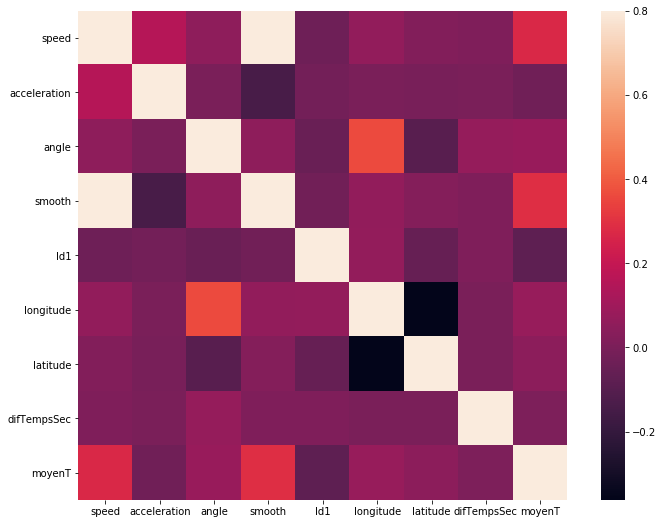

In [20]:

listedf=[df_voitureM,df_marcheM,df_busM,df_rerM]
ModifVit= pd.concat(listedf , ignore_index=True)

corrmat = ModifVit.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


Confusion matrix, without normalization
[[ 69  30  40   0]
 [ 12 142   9   0]
 [ 45  31  47   1]
 [ 10   2   5   5]]
Normalized confusion matrix
[[ 0.5   0.22  0.29  0.  ]
 [ 0.07  0.87  0.06  0.  ]
 [ 0.36  0.25  0.38  0.01]
 [ 0.45  0.09  0.23  0.23]]


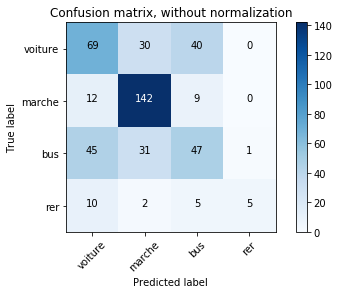

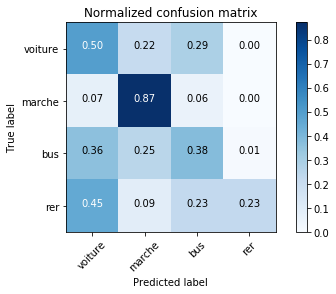

In [4]:
import itertools
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y_test = y_test
y_pred = Y_pred


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['voiture', 'marche', 'bus', 'rer'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['voiture', 'marche', 'bus', 'rer'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [2]:
Arret = pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/positions-geographiques-des-stations-du-reseau-ratp.csv', sep=';')

In [3]:
Arret =Arret[Arret.stop_lat!=0]
Arret =Arret[Arret.stop_lon!=0]


In [4]:
#Gerer erreur gps , choisir un perimetre de 20 mètre autour de l'arret, le but va etre ensuite de déterminer si trajectoire 
# à commencer et terminer par un arret (donc dans l'intervalle de valeur que l'on va calculer ) 
#si oui varaible positive,on commence sans distinction de type d'arret on affinera 
# selon le mode de transport de l'arrêt  si peu de précision
#formule utilisée : https://knowledge.safe.com/articles/725/calculating-accurate-length-in-meters-for-lat-long.html
#formule utilisée : https://knowledge.safe.com/articles/725/calculating-accurate-length-in-meters-for-lat-long.html
Arret['Lat1']=0
Arret['Lat2']=0
Arret['Lon1']=0
Arret['Lon2']=0

for i in range (0 , len(Arret)):
    Arret.loc[i,'Lat1']=Arret.loc[i,'stop_lat']-0.0000899*2  #0.0000899 correspond à 10 metre en latitude  
    Arret.loc[i,'Lat2']=Arret.loc[i,'stop_lat']+0.0000899*2
    Arret.loc[i,'Lon1']=Arret.loc[i,'stop_lon']-0.000139*2 #0.000139 correspond à 10 mètres en longitude 
    Arret.loc[i,'Lon2']=Arret.loc[i,'stop_lon']+0.000139*2

In [7]:
Arret.iloc[0]

stop_id                                2158
stop_name                     Achères-Ville
stop_desc        Avenue de Conflans - 78005
coord          48.9700771763, 2.07761818201
stop_lat                            48.9701
stop_lon                            2.07762
code_INSEE                            78005
departement                              78
Lat1                                48.9699
Lat2                                48.9703
Lon1                                2.07734
Lon2                                 2.0779
Name: 0, dtype: object

In [10]:
#Arret.to_csv('Arret.csv', sep=';')
print(len(df_3))


12256


In [5]:
df_1['DebFin']=0
for i in range(0, len(df_1)):
    
    for j in range(0 ,len(Arret)):
        if df_1.longitude[i]<= Arret.Lon2[j] and df_1.longitude[i]>= Arret.Lon1[j]  and df_1.latitude[i]>= Arret.Lat1[j] and df_1.latitude[i]<= Arret.Lat2[j]:
            df_1.loc[i,'DebFin'] =1
            break
        

In [6]:
df_1.to_csv('XarrModifVitesse.csv', sep=',')
print(df_1.head())

    sampno  speed  acceleration       angle     smooth  Id1  longitude  \
0  8507392   12.2      -0.07784  186.275472  13.600000    0   2.078366   
1  8507392   13.3       0.06116  186.287040  13.033333    0   2.078768   
2  8507392   10.5      -0.15568  186.299391  12.000000    0   2.079054   
3  8507392    6.0       0.18348  186.322198   3.600000    1   2.079334   
4  8507392    6.0       0.00000  186.315307   4.900000    1   2.079055   

    latitude  difTempsSec  moyenT    altitude  DebFin  
0  48.992353          5.0       1  241.399994       0  
1  48.992389          5.0       1  240.699997       0  
2  48.992354          5.0       1  245.199997       0  
3  48.992409          5.0       1  277.399994       0  
4  48.992399         15.0       1  281.100006       0  


In [26]:
del df_1
df_1=pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetGithub/XarrModifVitesse.csv', sep=',')
print(df_1.loc[0:50])


    Unnamed: 0      speed  acceleration       angle     smooth  Id1  \
0            0  12.200000     -0.077840  186.275472  13.600000    0   
1            1  13.300000      0.061160  186.287040  13.033333    0   
2            2  10.500000     -0.155680  186.299391  12.000000    0   
3            3   6.000000      0.183480  186.322198   3.600000    1   
4            4   6.000000      0.000000  186.315307   4.900000    1   
5            5  12.900000      0.383640  186.304193   8.300000    1   
6            6  17.500000      0.255760  186.290083  12.133333    1   
7            7  15.900000     -0.088960  186.273960  15.433333    1   
8            8  15.500000     -0.022240  186.257595  16.300000    1   
9            9   9.800000     -0.316920  186.243076  13.733333    1   
10          10  15.900000     -0.139000  186.261477  17.466667    2   
11          11  13.000000     -0.161240  186.276322  15.766666    2   
12          12  13.100000      0.005560  186.288368  14.000000    2   
13    

In [10]:
RerGare=pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetBitbucket/RerGare.csv', sep=';')
print(len(RerGare))
df_list=[]
#on garde juste les gares RER
RerGare1=RerGare[RerGare['RER']==1 ]
RerGare2=RerGare[RerGare['TRAIN']==1 ]
df_list.append(RerGare1)
df_list.append(RerGare2)  
RerGare = pd.concat(df_list, ignore_index=True)

RerGare['latitude']=0
RerGare['longitude']=0
RerGare['latitude1']=0
RerGare['latitude2']=0
RerGare['longitude1']=0
RerGare['longitude2']=0
print((RerGare['Geo Point'].iloc[0]).split(', ')[0])
for i in range(0, len(RerGare)):
    RerGare['latitude'].iloc[i] = RerGare['Geo Point'].iloc[i].split(', ')[0]
    RerGare['longitude'].iloc[i] = RerGare['Geo Point'].iloc[i].split(', ')[1]


918
48.8057703742


D:\Programmes\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
print(len(RerGare))

522


In [12]:
print(RerGare.head())
for i in range (0 , len(RerGare)):
    RerGare['latitude1'].iloc[i]=float(RerGare['latitude'].iloc[i])-0.0000899*2  #0.0000899 correspond à 10 metre en latitude  
    RerGare['latitude2'].iloc[i]=float(RerGare['latitude'].iloc[i])+0.0000899*2
    RerGare['longitude1'].iloc[i]=float(RerGare['longitude'].iloc[i])-0.000139*2 #0.000139 correspond à 10 mètres en longitude 
    RerGare['longitude2'].iloc[i]=float(RerGare['longitude'].iloc[i])+0.000139*2
    

                      Geo Point  \
0  48.8057703742, 2.61939578581   
1  48.7956548205, 2.65038766981   
2   48.626022428, 2.42873898192   
3  48.6055558264, 2.46245649414   
4  48.5645970274, 2.17097626776   

                                           Geo Shape  OBJECTID  ID_REF_ZDL  \
0  {"type": "Point", "coordinates": [2.6193957858...     232.0     43074.0   
1  {"type": "Point", "coordinates": [2.6503876698...     233.0     46568.0   
2  {"type": "Point", "coordinates": [2.4287389819...     348.0     47906.0   
3  {"type": "Point", "coordinates": [2.4624564941...     351.0     45759.0   
4  {"type": "Point", "coordinates": [2.1709762677...     344.0     43099.0   

                         NOM_LONG                           LABEL IDREFLIGA  \
0  EMERAINVILLE-PONTAULT-COMBAULT  ÉMERAINVILLE PONTAULT-COMBAULT    A01843   
1                  ROISSY-EN-BRIE                  ROISSY-EN-BRIE    A01843   
2              EVRY-COURCOURONNES              ÉVRY COURCOURONNES    A01842   
3   

D:\Programmes\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df_1['RerGare']=0
for i in range(0, len(df_1)):
    
    for j in range(0 ,len(RerGare)):
        if df_1.longitude[i]<= RerGare['longitude2'].iloc[j] and df_1.longitude[i]>= RerGare['longitude1'].iloc[j]  and df_1.latitude[i]>= RerGare['latitude1'].iloc[j] and df_1.latitude[i]<= RerGare['latitude2'].iloc[j]:
            df_1.loc[i,'RerGare'] =1
            break
        

In [14]:
df_1.to_csv('XarrModifVitesseRer.csv', sep=',')
print(df_1.head())

    sampno  speed  acceleration       angle     smooth  Id1  longitude  \
0  8507392   12.2      -0.07784  186.275472  13.600000    0   2.078366   
1  8507392   13.3       0.06116  186.287040  13.033333    0   2.078768   
2  8507392   10.5      -0.15568  186.299391  12.000000    0   2.079054   
3  8507392    6.0       0.18348  186.322198   3.600000    1   2.079334   
4  8507392    6.0       0.00000  186.315307   4.900000    1   2.079055   

    latitude  difTempsSec  moyenT    altitude  DebFin  RerGare  
0  48.992353          5.0       1  241.399994       0        0  
1  48.992389          5.0       1  240.699997       0        0  
2  48.992354          5.0       1  245.199997       0        0  
3  48.992409          5.0       1  277.399994       0        0  
4  48.992399         15.0       1  281.100006       0        0  


In [10]:
#Voir distance parcourues sur les trajectoires, savoir si l'utilsateur fais du surplace , peut déterminer des temps d'attentes
# / des comportements spécifiques aux utilisateusrs 
df_1['Distance2points']=0
df_1['DifLat']=0
df_1['DifLon']=0

for i in range(1, len(df_1)):
    if df_1.loc[i, 'Id1']== df_1.loc[i-1, 'Id1']:
        
        df_1.loc[i, 'DifLat']=df_1.loc[i, 'latitude']- df_1.loc[i-1, 'latitude']
        df_1.loc[i, 'DifLon']=df_1.loc[i, 'longitude']- df_1.loc[i-1, 'longitude']
    else:
        
        df_1.loc[i, 'DifLat']=0
        df_1.loc[i, 'DifLon']=0
        


# on garde la valeur absolue des différences 
import numpy as np
df_1.DifLat=np.abs(df_1.DifLat)
df_1.DifLon=np.abs(df_1.DifLon)

#on covertit en distance km 

df_1['DifLatKm']=df_1['DifLat']/0.00899
df_1['DifLonKm']=df_1['DifLon']/0.0139

df_1['Distance2points']=np.sqrt(np.power(df_1['DifLatKm'],2)+np.power(df_1['DifLonKm'],2))

           
    
    
    

In [10]:
#df_3.loc[:,'difTempsSec'] =df_1.loc[:, 'difTempsSec']
print(df_1)

          speed  acceleration       angle     smooth   Id1  longitude  \
0     12.200000     -0.077840  186.275472  13.600000     0   2.078366   
1     13.300000      0.061160  186.287040  13.033333     0   2.078768   
2     10.500000     -0.155680  186.299391  12.000000     0   2.079054   
3      6.000000      0.183480  186.322198   3.600000     1   2.079334   
4      6.000000      0.000000  186.315307   4.900000     1   2.079055   
5     12.900000      0.383640  186.304193   8.300000     1   2.078807   
6     17.500000      0.255760  186.290083  12.133333     1   2.078540   
7     15.900000     -0.088960  186.273960  15.433333     1   2.078259   
8     15.500000     -0.022240  186.257595  16.300000     1   2.077997   
9      9.800000     -0.316920  186.243076  13.733333     1   2.077754   
10    15.900000     -0.139000  186.261477  17.466667     2   2.077993   
11    13.000000     -0.161240  186.276322  15.766666     2   2.078411   
12    13.100000      0.005560  186.288368  14.00000

[8897 rows x 16 columns]


In [11]:
df_1['difTempsHeure']=0
df_1['difTempsHeure']= df_1['difTempsSec']/3600
df_1['vitesseMoyenne']=0
df_1['vitesseMoyenne']=df_1['DifLonKm']/df_1['difTempsHeure']
print(df_1.head())

   Unnamed: 0  speed  acceleration       angle     smooth  Id1  longitude  \
0           0   12.2      -0.07784  186.275472  13.600000    0   2.078366   
1           1   13.3       0.06116  186.287040  13.033333    0   2.078768   
2           2   10.5      -0.15568  186.299391  12.000000    0   2.079054   
3           3    6.0       0.18348  186.322198   3.600000    1   2.079334   
4           4    6.0       0.00000  186.315307   4.900000    1   2.079055   

    latitude  difTempsSec  moyenT  DebFin  Distance2points    DifLat  \
0  48.992353          5.0       1       0         0.000000  0.000000   
1  48.992389          5.0       1       0         0.029197  0.000036   
2  48.992354          5.0       1       0         0.020941  0.000035   
3  48.992409          5.0       1       0         0.000000  0.000000   
4  48.992399         15.0       1       0         0.020103  0.000010   

     DifLon  DifLatKm  DifLonKm  difTempsHeure  vitesseMoyenne  
0  0.000000  0.000000  0.000000       0

In [12]:
df_1['VitesseTraj']=0
NombreId=2240
print(NombreId)
taille =0
listeVit=[]
for i in range(0, NombreId-1):
   
    baseT= df_1[df_1.Id1==i  ]
    
    longueurT= len(baseT)
    debLon=baseT.loc[i+ taille, 'longitude']
    debLat=baseT.loc[i+taille, 'latitude']
    
    taille= taille +len(baseT)-1
    
    totalTemps= baseT.difTempsSec.sum()
    
    finLon=baseT.loc[i+ taille, 'longitude']
    finLat=baseT.loc[i+taille, 'latitude']
    difLon= np.abs(finLon- debLon)/0.00899  # distance en KM
    difLat= np.abs(finLat-debLat)/0.0139
    #print((np.sqrt(np.power(difLon,2)+np.power(difLat,2))/totalTemps)*3600)
    listeVit.append((np.sqrt(np.power(difLon,2)+np.power(difLat,2))/totalTemps)*3600)
        
   

         

2240


In [13]:
df_1.loc[0, 'VitesseTraj']= listeVit[0]
j=0
for i in range(1, len(df_1)-1):
    if df_1.loc[i,'Id1']== df_1.loc[i-1,'Id1' ]:
        df_1.loc[i,'VitesseTraj']=listeVit[j]
    else:
        j=j+1
        df_1.loc[i,'VitesseTraj']=listeVit[j]
        
        
print(df_1.head())

   Unnamed: 0  speed  acceleration       angle     smooth  Id1  longitude  \
0           0   12.2      -0.07784  186.275472  13.600000    0   2.078366   
1           1   13.3       0.06116  186.287040  13.033333    0   2.078768   
2           2   10.5      -0.15568  186.299391  12.000000    0   2.079054   
3           3    6.0       0.18348  186.322198   3.600000    1   2.079334   
4           4    6.0       0.00000  186.315307   4.900000    1   2.079055   

    latitude  difTempsSec  moyenT  DebFin  Distance2points    DifLat  \
0  48.992353          5.0       1       0         0.000000  0.000000   
1  48.992389          5.0       1       0         0.029197  0.000036   
2  48.992354          5.0       1       0         0.020941  0.000035   
3  48.992409          5.0       1       0         0.000000  0.000000   
4  48.992399         15.0       1       0         0.020103  0.000010   

     DifLon  DifLatKm  DifLonKm  difTempsHeure  vitesseMoyenne  VitesseTraj  
0  0.000000  0.000000  0.0

In [26]:
# en ommettant les vitesses sur les labels et les bus et les métros ou vitesse >5km , cela permet de récupperer les points d
# d'attentes ,et de pouvoir rendre effective  la variable début fin
# cependant il y a une perte de précisions qui liée à cette ommission de vittesse , car le temps d'attente d'un bus n'est pas une 
#véritablement une trajectoir de bus mais plutôt une attente à pied ,
# pour remédier à ca on va creer une variable temps d'attente =1 si la personne reste dans un meme périmetre definit
#pour les trajectoires étant labelliser bus ou métro , en supprimant ces points nous gagnerons en précisions 
#mais nous aurons tous de même la variable DF qui nous indiquera si le trajet a commencé et terminera par un arrêt.

taille=0
df_3['DF']=0
listeDF=[]
for i in range(0, 2290):  # nombre d'id 
    
    baseT= df_3[df_3.Id1==i  ]
    deb=baseT.DebFin[0+taille]
    taille=taille+len(baseT)
    fin =baseT.DebFin[0+taille-1]
    if deb==fin and fin ==1:
        listeDF.append(1)
    else :
        listeDF.append(0)

df_3.loc[0, 'DF']= listeDF[0]

j=0
for i in range(1, len(df_3)-1):
    if df_3.loc[i,'Id1']== df_3.loc[i-1,'Id1' ]:
        df_3.loc[i,'DF']=listeDF[j]
    else:
        j=j+1
        df_3.loc[i,'DF']=listeDF[j]
                

        
        

In [6]:
#ajout des POI

Cluster =pd.read_csv('C:/Users/MyPC/Desktop/Projet Gps/ProjetGitHub/POI (Extraction cluster DBSCAN de tous les utilisateurs/ClusterUtilisateurs.csv')

In [ ]:
# perte de précision du à l'enlevement des critère de vitesse 
#on va introduire la variable attente qui visera à savoir si l'individu reste en position stationnaire par rapport à sa première position

In [10]:
#Cadrant de 50 mètres, lieu de passage 

Cluster['latitude1']=0  
Cluster['latitude2']=0
Cluster['longitude1']=0
Cluster['longitude2']=0


for i in range (0 , len(Cluster)):
    Cluster['latitude1'].iloc[i]=float(Cluster['latitude'].iloc[i])-0.0000899*5  #0.0000899 correspond à 10 metre en latitude  
    Cluster['latitude2'].iloc[i]=float(Cluster['latitude'].iloc[i])+0.0000899*5
    Cluster['longitude1'].iloc[i]=float(Cluster['longitude'].iloc[i])-0.000139*5 #0.000139 correspond à 10 mètres en longitude 
    Cluster['longitude2'].iloc[i]=float(Cluster['longitude'].iloc[i])+0.000139*5

D:\Programmes\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#ajout variable POI si proche cluster et en journée pour éviter lieu de résidence , 1 si proche 0 sinon on dira 20 mètres
# possibilité d'avoir plusieurs cluster proche +1 
df_1['Cluster']=0
for i in range(0, len(df_1)):
    
    for j in range(0 ,len(Cluster)):
        if df_1.longitude[i]<= Cluster['longitude2'].iloc[j] and df_1.longitude[i]>= Cluster['longitude1'].iloc[j]  and df_1.latitude[i]>= Cluster['latitude1'].iloc[j] and df_1.latitude[i]<= Cluster['latitude2'].iloc[j]:
            df_1.loc[i,'Cluster'] =df_1.loc[i,'Cluster'] +1
            
        

In [23]:
df_1.to_csv('XarrCluster.csv', sep=',')


0.59375
Confusion matrix, without normalization
[[ 70  27  35   1   0]
 [ 14 142   9   1   0]
 [ 49  26  53   1   0]
 [  7   3   7   1   0]
 [  2   0   0   0   0]]
Normalized confusion matrix
[[ 0.53  0.2   0.26  0.01  0.  ]
 [ 0.08  0.86  0.05  0.01  0.  ]
 [ 0.38  0.2   0.41  0.01  0.  ]
 [ 0.39  0.17  0.39  0.06  0.  ]
 [ 1.    0.    0.    0.    0.  ]]


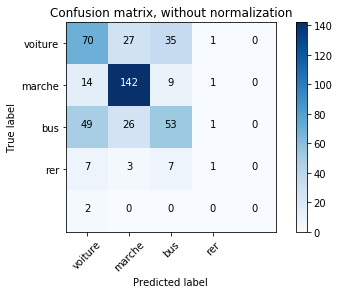

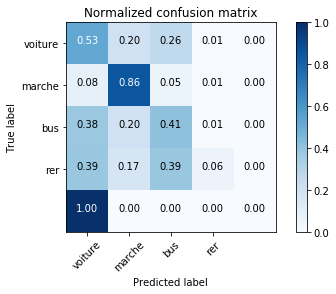

In [17]:
knn = KNeighborsClassifier(n_neighbors =9)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

print((Y_pred==y_test).mean())
import itertools
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

y_test = y_test
y_pred = Y_pred


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['voiture', 'marche', 'bus', 'rer'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['voiture', 'marche', 'bus', 'rer'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [15]:
### on extracte les features en fonction de la colonne id 

#l'ajout seul de la variable cluster est nocive dans la classification
#df_essai= df_1[['speed',  'acceleration','angle','smooth','Id1','DebFin', 'vitesseMoyenne','DF','RerGare', 'Cluster']]
#df_essai= df_1[['speed',  'acceleration','angle','DebFin','Id1','smooth']] 70.8% de précision
#vitesseMoyenne  et vitesseTraj mauvaise variables fait perdre en précision

df_essai= df_1[['speed',  'acceleration','angle','Id1','smooth', 'RerGare','DebFin' ]]
#df_essai= df_3[['speed',  'acceleration','angle','smooth','Id1']]
df_essai = df_essai[np.isfinite(df_essai['acceleration'])]
#df_essai = df_essai[np.isfinite(df_essai['VitesseTraj'])]
#df_essai = df_essai[np.isfinite(df_essai['vitesseMoyenne'])]
df_essai = df_essai[np.isfinite(df_essai['speed'])]

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.39it/s]
D:\Programmes\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


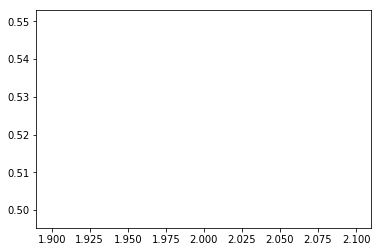

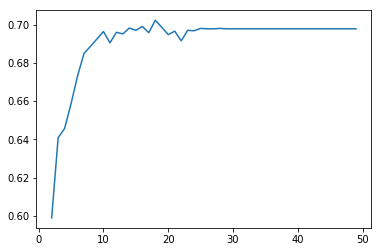

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
y= list(df_2.iloc[:,1])
X = extract_features(df_essai, column_id="Id1", default_fc_parameters=MinimalFCParameters())
index= []
resultat=[]
for i in range(2,3):
    index.append(i)
    knn = KNeighborsClassifier(n_neighbors =i)
    scores = cross_val_score(knn, X, y, cv=10)
    #print(scores)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    resultat.append(scores.mean())

plot(index,resultat)
plt.show()
del index
del resultat
index= []
resultat=[]


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification




for i in range(2,50):
    index.append(i)
    clf = RandomForestClassifier(max_depth=i,n_estimators=40, random_state=0)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    scores = cross_val_score(clf, X, y, cv=cv)
    #print(scores)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    resultat.append(scores.mean())

plot(index,resultat)
plt.show()


In [17]:
#randomized grid search 


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
y= list(df_2.iloc[:,1])
X = extract_features(df_essai, column_id="Id1", default_fc_parameters=MinimalFCParameters())



from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=40)

param_dist = {"max_depth": sp_randint(1, 20),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
n_iter_search = 20
grid_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, refit=True)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

scores = cross_val_score(grid_search.best_estimator_, X, y, cv=cv)
print(scores)
print(scores.mean())
print(grid_search.cv_results_)


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.67it/s]


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=11, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[ 0.69105691  0.72764228  0.71747967  0.68902439  0.69105691  0.71747967
  0.68495935  0.70325203  0.68699187  0.72357724]
0.70325203252
{'mean_fit_time': array([ 0.05781118,  0.080211  ,  0.09391443,  0.14806167,  0.11564843,
        0.25535226,  0.11330207,  0.21625606,  0.12733046,  0.16678135,
        0.25602174,  0.21457863,  0.13267605,  0.08691239,  0.13972195,
        0.22526217,  0.07686345,  0.52841353,  0.04511221,  0.44417914]), 'std_fit_time': array([ 0.00206147,  0.00327675,  0.00526381,  0.00420087,  0.00188506,
        0.01655199,  0.00245074,  0.01116537,  0.004

        0.00561092,  0.00977366,  0.00076256,  0.00676664,  0.01387022])}


In [32]:
#randomized grid search 


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
y= list(df_2.iloc[:,1])
X = extract_features(df_essai, column_id="Id1", default_fc_parameters=MinimalFCParameters())



from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=40)

# use a full grid over all parameters
param_grid = {"max_depth":[8] ,
              "max_features": range(1,20),
              "min_samples_split": range(2,12),
              "min_samples_leaf": range(1,20),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X, y)
print(grid_search.best_estimator_)
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

scores = cross_val_score(grid_search.best_estimator_, X, y, cv=cv)
print(scores)
print(scores.mean())
print(grid_search.cv_results_)


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.12it/s]


KeyboardInterrupt: 

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.75it/s]
D:\Programmes\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[ 0.68  0.74  0.7   0.66  0.65  0.67  0.74  0.69  0.64  0.65]
Accuracy: 0.68 (+/- 0.07)
0.719512195122
Sorted Feature Importance:
[(0.089653639812070376, 'speed__minimum'), (0.07703535838254047, 'speed__mean'), (0.067822827829576979, 'speed__maximum'), (0.065157548523651812, 'speed__median'), (0.049222110180190057, 'acceleration__maximum'), (0.038641107811005757, 'acceleration__mean'), (0.036063362492375135, 'smooth__mean'), (0.031554315847439132, 'acceleration__sum_values'), (0.031554042379633197, 'smooth__sum_values'), (0.031136921564837015, 'speed__variance'), (0.030656438236880829, 'smooth__minimum'), (0.030544201640136666, 'acceleration__median'), (0.029980028381538664, 'smooth__maximum'), (0.029862632161108314, 'smooth__median'), (0.027083518992973038, 'speed__sum_values'), (0.026330819338195161, 'angle__mean'), (0.023623265032870183, 'speed__standard_deviation'), (0.023445461584243051, 'angle__minimum'), (0.023038728934862411, 'angle__median'), (0.022446846529251701, 'accelerati

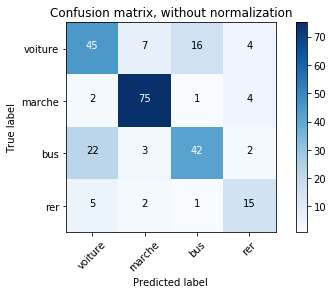

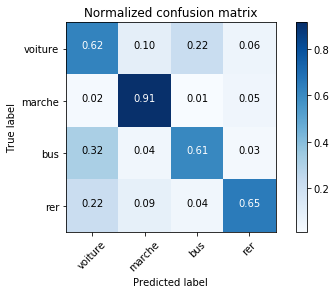

In [27]:
#Rer toujours assez bas on va incorporrer stations rer pour essayer d'ameliorer un peu le resultat 
import itertools
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = extract_features(df_essai, column_id="Id1", default_fc_parameters=MinimalFCParameters())

#clf = RandomForestClassifier(max_depth=8, random_state=0, oob_score=True)
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=11, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
clf.fit(X_train,y_train)
Y_pred= clf.predict(X_test)
print((Y_pred==y_test).mean())
y_test = y_test
y_pred = Y_pred


importances = clf.feature_importances_
 
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)
#print('oob error', clf.oob_score_)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['voiture', 'marche', 'bus', 'rer'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['voiture', 'marche', 'bus', 'rer'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



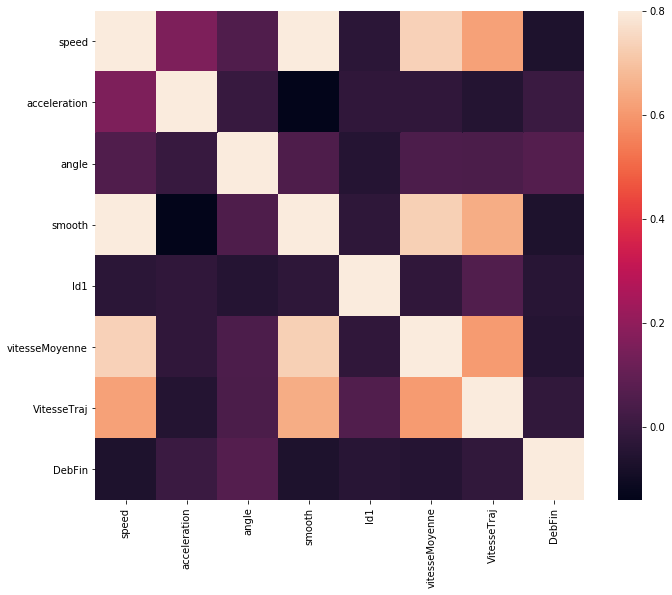

In [18]:
#
corrmat = df_essai.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [68]:
### A FAIRE 
### definir impact des features , faire experience  sans et avec ,
### schema avec score apprentissage et test 
### faire jointure localistation 
### d'autres données plus fiable, et non pas une supposition de ce que veut dire l'utlisateur dans sa description,
##entrainer le modele avec 
### faire jointure avec localisation et presence arret de bus , creer varibale binaires , ou plutot calquer trajectoire
### avec trajctoire itineraire  bus connu , surement plus fiable la deuxieme solution car en zone urbaine il y a des arrets de bus un 
#peu partout 


(2046,)

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

2045


2046